In [1]:
versioninfo()

Julia Version 1.8.5
Commit 17cfb8e65ea (2023-01-08 06:45 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 12 × Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, skylake)
  Threads: 1 on 12 virtual cores


## 11-3. DifferentialEquations.jl による常微分方程式の数値的解法

※ 本文とは環境等を少し変えています（コードはほぼ同一です）

In [2]:
]activate DifferentialEquationsSample

  Activating new project at `/path/to/JuliaBook2023Samples/notebooks/Chapter11/DifferentialEquationsSample`


### コード11-9. `DifferentialEquations.jl` パッケージの追加

```julia
(@v1.7) pkg> add DifferentialEquations
    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General`
   Resolving package versions...
   Installed Hwloc_jll ─────────── v2.7.1+0
   Installed StrideArraysCore ──── v0.2.15
   Installed DiffEqBase ────────── v6.82.2
   Installed DualNumbers ───────── v0.6.8
   ：《中略》
    Updating `~/.julia/environments/v1.7/Project.toml`
  [0c46a032] + DifferentialEquations v7.1.0
    Updating `~/.julia/environments/v1.7/Manifest.toml`
   ：《中略》
  [2b5f629d] + DiffEqBase v6.82.2
  [459566f4] + DiffEqCallbacks v2.22.0
  [c894b116] + DiffEqJump v8.3.0
  [77a26b50] + DiffEqNoiseProcess v5.9.0
  [163ba53b] + DiffResults v1.0.3
  [b552c78f] + DiffRules v1.10.0
  [0c46a032] + DifferentialEquations v7.1.0
   ：《以下略》

(@v1.7) pkg> st DifferentialEquations
      Status `~/.julia/environments/v1.7/Project.toml`
  [0c46a032] DifferentialEquations v7.1.0
```

In [3]:
]add DifferentialEquations@7.1.0

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `git@github.com:JuliaRegistries/General.git`
   Resolving package versions...
   Installed StatsFuns ──────────────────────── v1.1.1
   Installed OffsetArrays ───────────────────── v1.12.8
   Installed HypergeometricFunctions ────────── v0.3.11
   Installed PDMats ─────────────────────────── v0.11.16
   Installed NonlinearSolve ─────────────────── v1.3.0
   Installed Polyester ──────────────────────── v0.7.2
   Installed EnumX ──────────────────────────── v1.0.4
   Installed RecursiveArrayTools ────────────── v2.36.0
   Installed FunctionWrappers ───────────────── v1.1.3
   Installed TriangularSolve ────────────────── v0.1.19
   Installed BoundaryValueDiffEq ────────────── v2.11.0
   Installed Static ─────────────────────────── v0.8.3
   Installed ArrayInterfaceOffsetArrays ─────── v0.1.7
   Installed Missings ───────────────────────── v1.1.0
   Installed SLEEFPirates ───────────────────── v0.6.38
   Installed

  [bea87d4a] + SuiteSparse_jll v5.10.1+0
  [83775a58] + Zlib_jll v1.2.12+3
  [8e850b90] + libblastrampoline_jll v5.1.1+0
  [8e850ede] + nghttp2_jll v1.48.0+0
  [3f19e933] + p7zip_jll v17.4.0+0
        Info Packages marked with ⌃ have new versions available and may be upgradable.
Precompiling project...
  ✓ PoissonRandom
  ✓ EnumX
  ✓ MuladdMacro
  ✓ SIMDTypes
  ✓ PositiveFactorizations
  ✓ Inflate
  ✓ IfElse
  ✓ CommonSolve
  ✓ PDMats
  ✓ FunctionWrappers
  ✓ Calculus
  ✓ CpuId
  ✓ SymbolicIndexingInterface
  ✓ Adapt
  ✓ Tricks
  ✓ FastClosures
  ✓ CEnum
  ✓ TreeViews
  ✓ FillArrays
  ✓ ManualMemory
  ✓ RuntimeGeneratedFunctions
  ✓ DensityInterface
  ✓ Missings
  ✓ GenericSchur
  ✓ SortingAlgorithms
  ✓ SuiteSparse_jll
  ✓ Rmath_jll
base64 binary data: RXJyb3IgaW4gVGltZXI6ClpNURtbMzJtICDinJMgG1szOW0bWzkwbVJhbmRvbU51bWJlcnMbWzM5bS4KU3RhdGVFcnJvcigbWzMybSAg4pyTIBtbMzltG1s5MG1Lcnlsb3YbWzM5bSIK44IbWzMybSAg4pyTIBtbMzltG1s5MG1GYXN0TGFwYWNrSW50ZXJmYWNlG1szOW23CuOCG1szMm0gIOKckyAbWzM5bRtbOTBt

In [14]:
]add Plots@1.29.0

   Resolving package versions...
   Installed GR_jll ─────────── v0.69.1+0
   Installed Measures ───────── v0.3.2
   Installed Qt5Base_jll ────── v5.15.3+2
   Installed PlotUtils ──────── v1.3.4
   Installed xkbcommon_jll ──── v1.4.1+0
   Installed EarCut_jll ─────── v2.2.4+0
   Installed GLFW_jll ───────── v3.3.8+0
   Installed PlotThemes ─────── v3.1.0
   Installed libaom_jll ─────── v3.4.0+0
   Installed Scratch ────────── v1.1.1
   Installed Colors ─────────── v0.12.10
   Installed ColorTypes ─────── v0.11.4
   Installed Libtiff_jll ────── v4.4.0+0
   Installed ColorVectorSpace ─ v0.9.10
   Installed Extents ────────── v0.1.1
   Installed XML2_jll ───────── v2.10.3+0
   Installed FFMPEG_jll ─────── v4.4.2+2
   Installed Wayland_jll ────── v1.21.0+0
   Installed Libiconv_jll ───── v1.16.1+2
   Installed Latexify ───────── v0.15.18
   Installed GeometryBasics ─── v0.4.5
   Installed StructArrays ───── v0.6.14
   Installed ColorSchemes ───── v3.20.0
   Installed Glib_jll ───────── v2.

Precompiling project...
  ✓ IniFile
  ✓ LaTeXStrings
  ✓ Unzip
  ✓ Extents
  ✓ TensorCore
  ✓ Measures
  ✓ PCRE2_jll
  ✓ Scratch
  ✓ Formatting
  ✓ IterTools
  ✓ UnicodeFun
  ✓ Grisu
  ✓ Bzip2_jll
  ✓ Graphite2_jll
  ✓ Libmount_jll
  ✓ Xorg_libXau_jll
  ✓ libpng_jll
  ✓ libfdk_aac_jll
  ✓ LAME_jll
  ✓ Pixman_jll
  ✓ EarCut_jll
  ✓ LERC_jll
  ✓ JpegTurbo_jll
  ✓ StructArrays
  ✓ Xorg_libXdmcp_jll
  ✓ Ogg_jll
  ✓ x264_jll
  ✓ x265_jll
  ✓ libaom_jll
  ✓ Zstd_jll
  ✓ Expat_jll
  ✓ LZO_jll
  ✓ Opus_jll
  ✓ Xorg_xtrans_jll
  ✓ Libiconv_jll
  ✓ Libffi_jll
  ✓ Xorg_libpthread_stubs_jll
  ✓ Wayland_protocols_jll
  ✓ FriBidi_jll
  ✓ Libgpg_error_jll
  ✓ RelocatableFolders
  ✓ Libuuid_jll
  ✓ FixedPointNumbers
  ✓ Showoff
  ✓ FreeType2_jll
  ✓ GeoInterface
  ✓ libvorbis_jll
  ✓ Libgcrypt_jll
  ✓ Libtiff_jll
  ✓ XML2_jll
  ✓ Fontconfig_jll
  ✓ XSLT_jll
  ✓ Gettext_jll
  ✓ Wayland_jll
  ✓ Contour
  ✓ Glib_jll
  ✓ Xorg_libxcb_jll
  ✓ Latexify
  ✓ Xorg_libX11_jll
  ✓ Xorg_xcb_util_jll
  ✓ HTTP
  ✓ X

In [15]:
]st DifferentialEquations

Status `/path/to/JuliaBook2023Samples/notebooks/Chapter11/DifferentialEquationsSample/Project.toml`
⌃ [0c46a032] DifferentialEquations v7.1.0
Info Packages marked with ⌃ have new versions available and may be upgradable.


$$
\begin{cases}
\begin{aligned}
\frac{dx}{dt} &= ax - bxy & \mathrm{-\!\!-}\ (1) \\
\frac{dy}{dt} &= cxy - dy & \mathrm{-\!\!-}\ (2)
\end{aligned}
\end{cases} \qquad (a,b,c,d>0)
$$

### コード11-10. 微分方程式を表す関数の例（ロトカ・ヴォルテラの方程式）

In [6]:
function f!(du, u, params, t)
    x, y = u
    a, b, c, d = params
    du[1] = a*x - b*x*y  # -- (1)
    du[2] = c*x*y - d*y  # -- (2)
end

f! (generic function with 1 method)

### コード11-11. 微分方程式の「初期値問題」の定義例

In [7]:
using DifferentialEquations

In [8]:
u0 = [3.0, 1.0];  # 初期値（$u(t_0)$ の値）

In [9]:
tspan = [0, 20];  # 時刻0（$t_0$）から20まで計算する

In [10]:
params = [1, 2, 3, 4];  # パラメータ（`a, b, c, d`）の値

In [11]:
prob = ODEProblem(f!, u0, tspan, params)  # 「常微分方程式の初期値問題」オブジェクトの生成

ODEProblem with uType Vector{Float64} and tType Int64. In-place: true
timespan: (0, 20)
u0: 2-element Vector{Float64}:
 3.0
 1.0

### コード11-12. 初期値問題の求解

In [12]:
solution = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 74-element Vector{Float64}:
  0.0
  0.05997824764291295
  0.14693279871399884
  0.2341164217432749
  0.3384046905982152
  0.46315566649988615
  0.6194223053054304
  0.7742841707324177
  0.9634132432003731
  1.182344721665697
  1.4141787874815046
  1.6681960929688044
  1.9585238362857467
  ⋮
 16.828626230614898
 17.123499577123834
 17.467513930066264
 17.823263180397454
 18.183806102507088
 18.69653377976178
 19.03107519632016
 19.23974850547197
 19.438128034408933
 19.65727690108259
 19.859828055088187
 20.0
u: 74-element Vector{Vector{Float64}}:
 [3.0, 1.0]
 [2.7721495697098018, 1.32420218141652]
 [2.2998670807897685, 1.8173733258243445]
 [1.7652019540025823, 2.181514574757863]
 [1.2217811937514071, 2.283597707873739]
 [0.8049929952653918, 2.010675431818713]
 [0.5461832437530237, 1.4649466993397715]
 [0.4376136384744508, 0.9872670170607167]
 [0.3951

### コード11-13. 結果の確認（グラフ描画による可視化）

In [16]:
]st Plots

Status `/path/to/JuliaBook2023Samples/notebooks/Chapter11/DifferentialEquationsSample/Project.toml`
⌃ [91a5bcdd] Plots v1.29.0
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [17]:
using Plots  # 事前に `] add Plots` が必要

In [18]:
gr()  # GRバックエンドを利用

Plots.GRBackend()

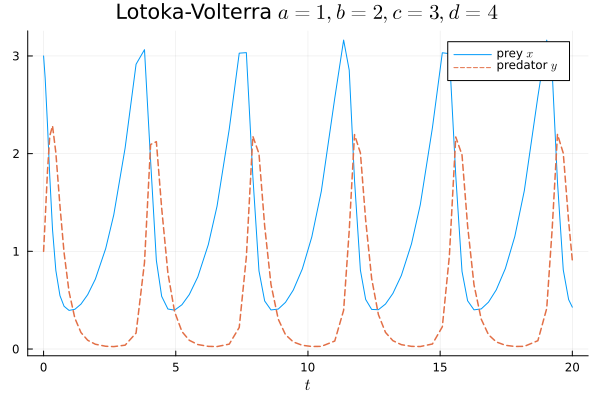

In [19]:
ts = solution.t;
xs = solution[1, :];  # Same as `xs = [u[1] for u in solution.u];`
ys = solution[2, :];  # Same as `ys = [u[2] for u in solution.u];`
a, b, c, d = params;
plt = plot(ts, [xs ys];
    line=([1 1.5], [:solid  :dash]),
    label=["prey \$x\$" "predator \$y\$"],
    title="Lotoka-Volterra \$a=$(a), b=$(b), c=$(c), d=$(d)\$",
    xlabel="\$t\$",
)

In [20]:
savefig(plt, "lotka_volterra_plot1.svg")  # 表示できなくても←これでファイルに保存できる

### コード11-14. 計算手法（アルゴリズム）・追加パラメータ指定の例

In [21]:
result = solve(prob, RK4(), dt=0.05, adaptive=false);

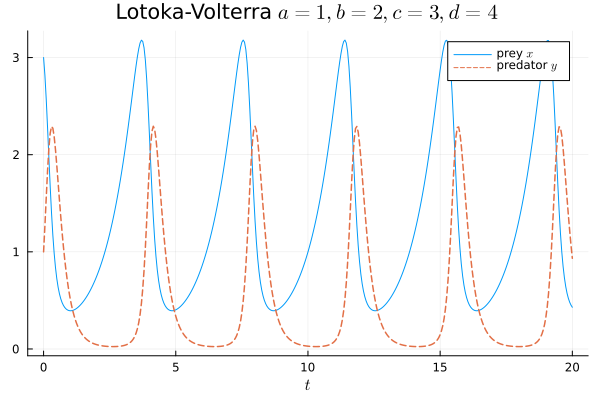

In [23]:
ts = result.t;
xs = result[1, :];
ys = result[2, :];
a, b, c, d = params;
plt = plot(ts, [xs ys];
    line=([1 1.5], [:solid  :dash]),
    label=["prey \$x\$" "predator \$y\$"],
    title="Lotoka-Volterra \$a=$(a), b=$(b), c=$(c), d=$(d)\$",
    xlabel="\$t\$",
)

In [24]:
savefig(plt, "lotka_volterra_plot2.svg")